In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=["Unnamed: 0","year", "month"], axis=1,inplace=True)

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [14]:
df.isnull()
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

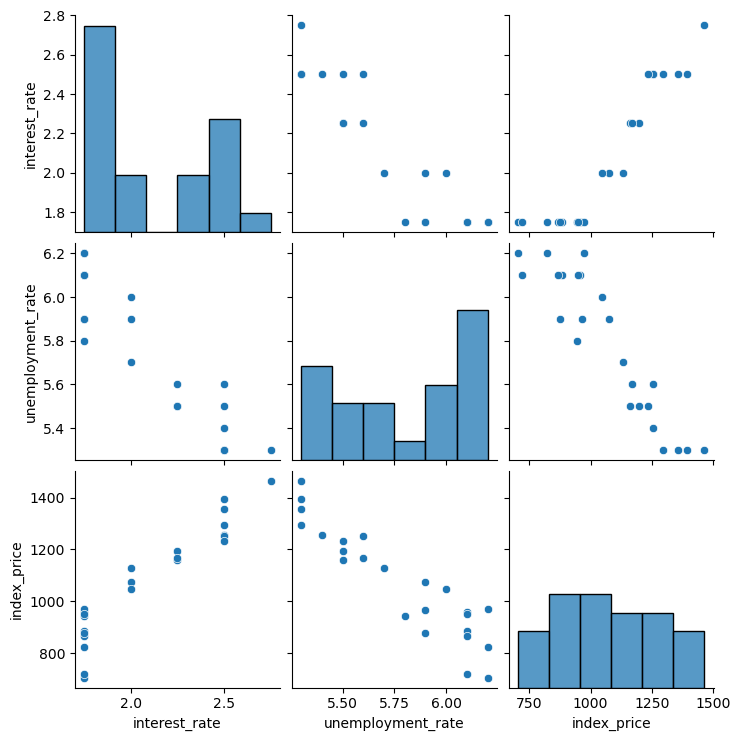

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


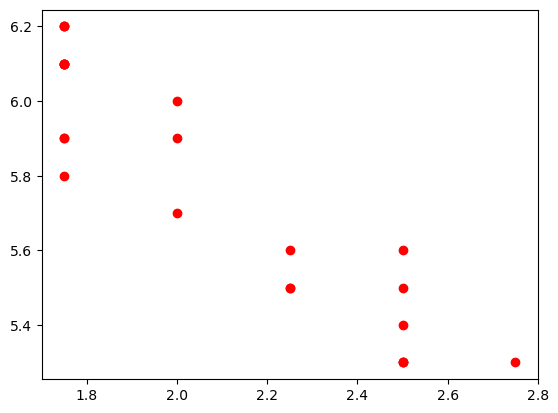

In [ ]:
# plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')

In [27]:
# X = df.iloc[:,:,-1]
# y = df,iloc[:,-1]

X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [29]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [31]:
# train test split 
from sklearn.model_selection import train_test_split

In [33]:
X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_test.head()

13     965
1     1394
21     822
5     1254
2     1357
Name: index_price, dtype: int64

<Axes: xlabel='interest_rate', ylabel='index_price'>

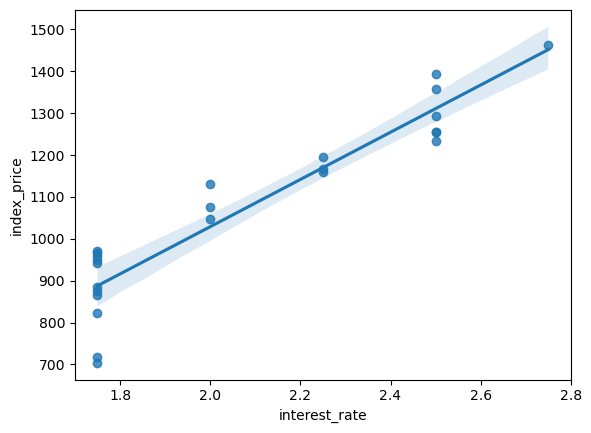

In [37]:
sns.regplot(x= df['interest_rate'],y = df['index_price'])